In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def average(data, n):
    """ Moyenne les valeurs de data par paquets de taille n"""
    databis = data[len(data)%n:]
    return databis.reshape(len(data)//n, n).mean(axis=1)

In [4]:
def allan_variance_simple(data, n):
    y = average(data, n)
    #z = np.array([y[i+1] - y[i] for i in range(len(y) - 1)])
    z = y[1:] - y[:-1]
    #z = np.diff(y)
    return np.mean(z**2)/2

In [5]:
allan_variance_simple(np.arange(37), 3)

4.5

In [6]:
def allan_variance(data):
    n_max = int(np.log2(len(data)))-1
    Tn = 2**np.arange(n_max)
    return Tn, np.array([allan_variance_simple(data, n) for n in Tn])

## Exemple

In [8]:
from numpy.random import normal

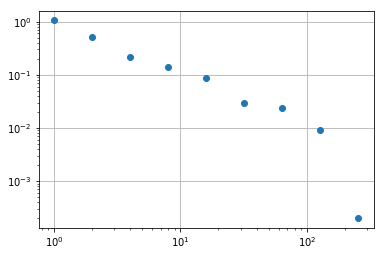

In [9]:
data = normal(size=1024)
Tn, va = allan_variance(data)
plt.loglog(Tn, va, 'o')
plt.grid()

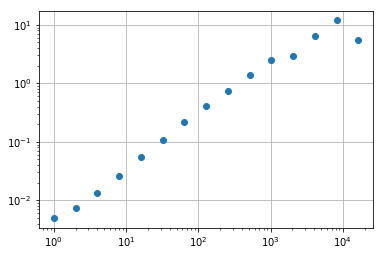

In [10]:
data = 0.1*np.cumsum(np.random.normal(size=2**16))
Tn, va = allan_variance(data)
plt.loglog(Tn, va, 'o')
plt.grid()

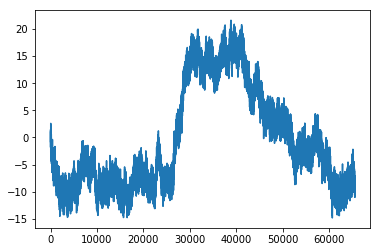

In [12]:
data = 0.1*np.cumsum(np.random.normal(size=2**16)) + normal(size=2**16)
plt.plot(data)

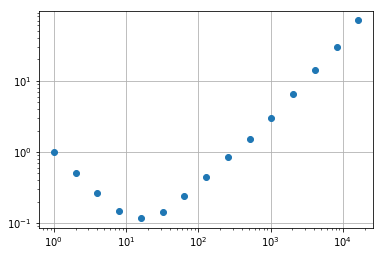

In [13]:
Tn, va = allan_variance(data)
plt.loglog(Tn, va, 'o')
plt.grid()

## Température

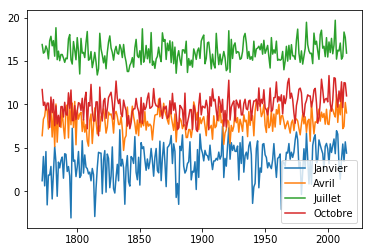

In [22]:
data = np.loadtxt('temperature_londres.dat')
annee = data[:,0]
temperature = data[:,1:]

mois = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre',
       'Octobre', 'Novembre', 'Decembre']


for i_mois in [0, 3, 6, 9]:
    plt.plot(annee, temperature[:, i_mois], label=mois[i_mois])
plt.legend()


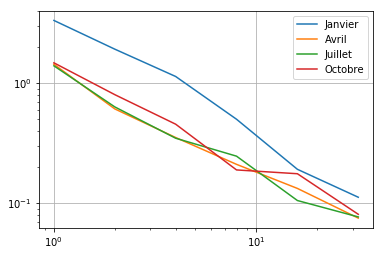

In [23]:

for i_mois in [0, 3, 6, 9]:
    Tn, va = allan_variance(temperature[:, i_mois])
    plt.loglog(Tn, va, label=mois[i_mois])
plt.legend()
plt.grid()

## CAC 40

In [24]:
bourse = np.loadtxt("cac_40.csv", skiprows=4, delimiter=',', usecols=3, converters={3:eval})

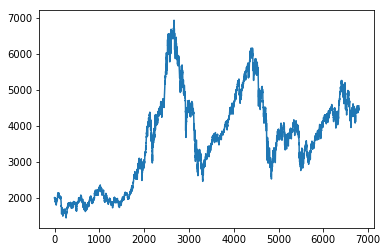

In [25]:
plt.plot(bourse)

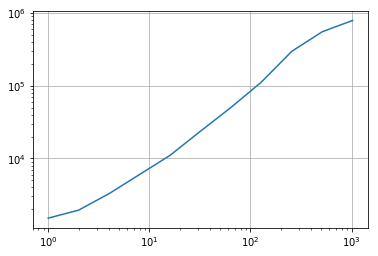

In [27]:
Tn, va = allan_variance(bourse)
plt.loglog(Tn, va)
plt.grid()